In [1]:
import functools
import random
import time
from arc.interface import Board, BoardPair
from arc.utils.dataset import get_riddles
from arc.augmentations import functional
from arc.augmentations.classes.color import RandomColor
from arc.augmentations.classes.spatial import RandomCropInputAndOuput, RandomDoubleInputBoard, RandomRotate, RandomReflect
from arc.augmentations.classes.noise import Noise
from arc.augmentations.classes.helpers import same_aug_for_all_pairs_helper
from arc.augmentations.vis_helpers import plot_task

## Table of Contents
1. [Load a riddle](#load)
2. [Noise](#noise)
3. [Permute color](#permute)
4. [Random crop](#crop)
5. [Double input board](#double)
6. [Rotate](#rotate)
7. [Reflect](#reflect)

### Load a riddle <a name="load"></a>

In [2]:
# Load all riddles
train_riddles = get_riddles(["training"])

2022-09-07 00:22:33.375 | INFO     | arc.utils.dataset:get_riddles:122 - Loading riddles from ['training']


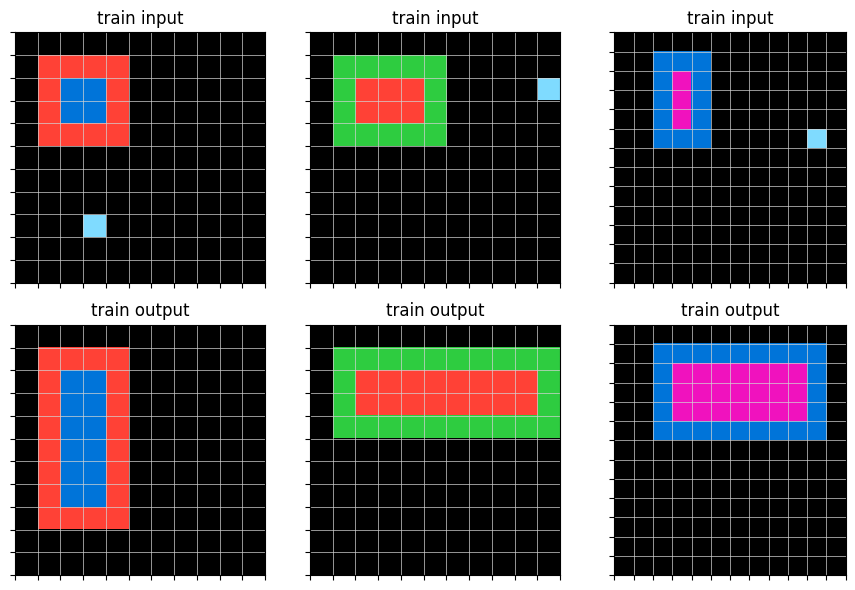

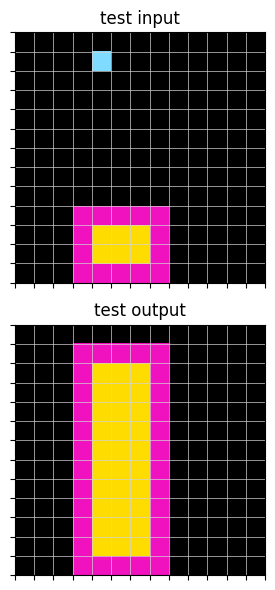

In [3]:
riddle = train_riddles[1]
plot_task(riddle)

### Noise <a name="noise"></a>

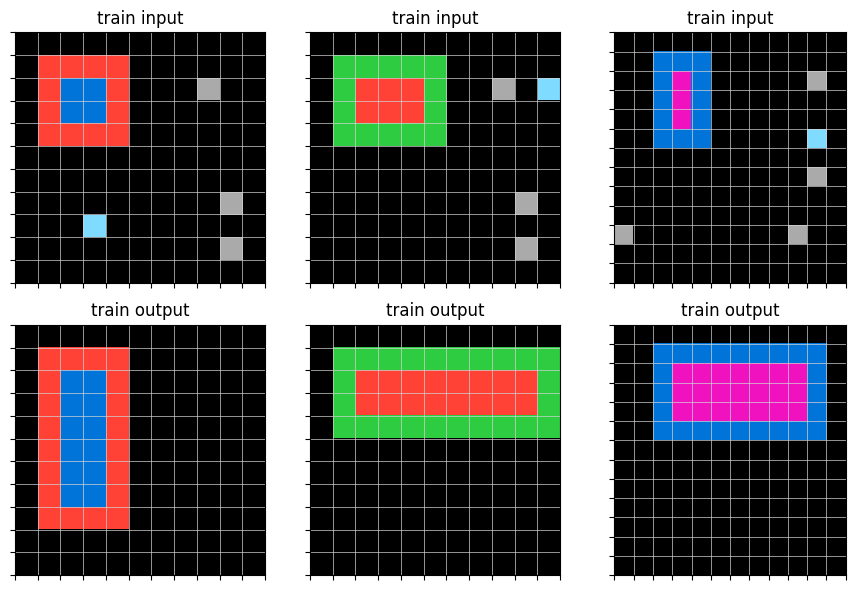

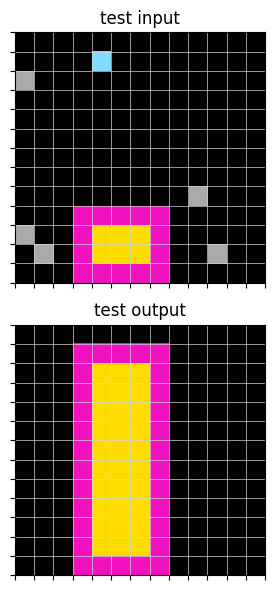

In [4]:
aug = Noise(p=1, same_aug_for_all_pairs=True, noise_level=0.03, noise_size=(1,1))
aug_riddle = riddle.copy()
aug_riddle = aug(aug_riddle)
plot_task(aug_riddle)

### Permute color <a name="permute"></a>

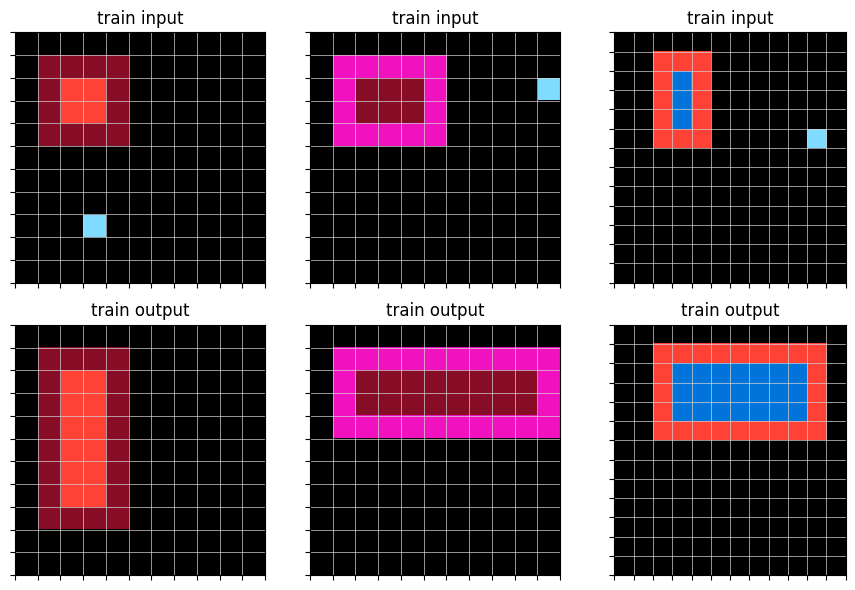

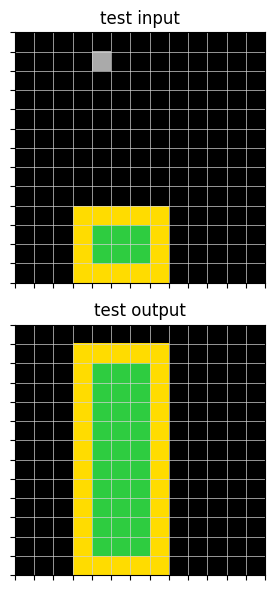

In [5]:
aug = RandomColor(p=1, same_aug_for_all_pairs=True, include_0=False)
aug_riddle = riddle.copy()
aug_riddle.train = aug(aug_riddle.train)
aug_riddle.test = aug(aug_riddle.test)
plot_task(aug_riddle)

### Random Crop (Input and Ouput) <a name="crop"></a>

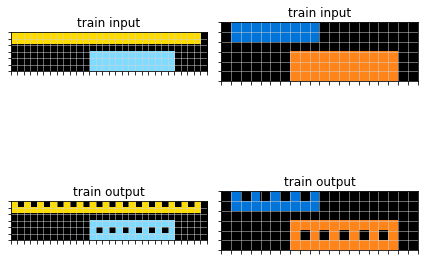

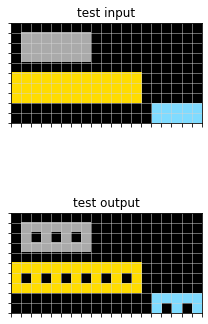

In [54]:
aug = RandomCropInputAndOuput(p=1,possible_num_cols_to_crop=range(5), possible_num_rows_to_crop=range(5),same_aug_for_all_pairs=True)
aug_riddle = riddle.copy()
aug_riddle.train = aug(aug_riddle.train)
aug_riddle.test = aug(aug_riddle.test)
plot_task(aug_riddle)

### Double input board <a name="double"></a>

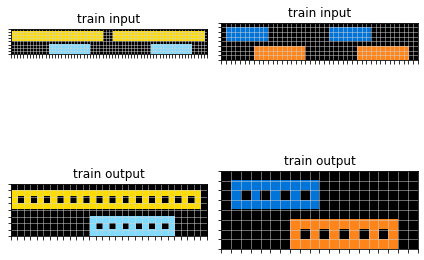

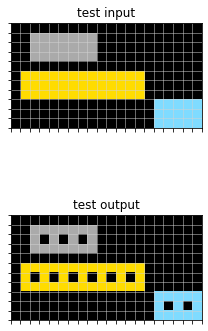

In [60]:
aug = RandomDoubleInputBoard(1, True)
aug_riddle = riddle.copy(deep=True)
aug_riddle.train = aug(aug_riddle.train)
plot_task(aug_riddle)

### Rotate <a name="rotate"></a>

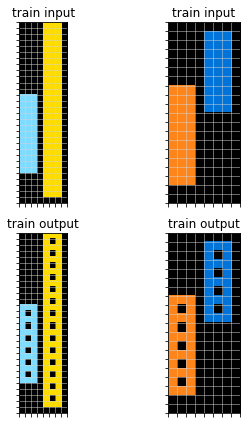

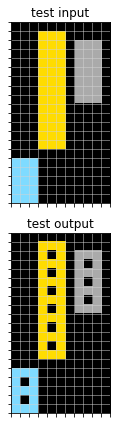

In [68]:
aug = RandomRotate(1, True)
aug_riddle = riddle.copy()
aug_riddle.train = aug(riddle.train)
aug_riddle.test = aug(riddle.test)
plot_task(aug_riddle)

### Reflect <a name="reflect"></a>

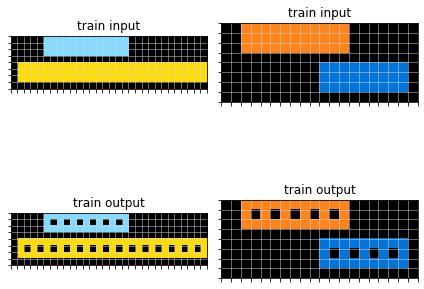

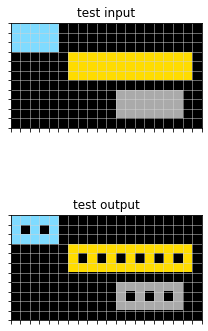

In [73]:
aug = RandomReflect(1, True)
aug_riddle = riddle.copy()
aug_riddle.train = aug(riddle.train)
aug_riddle.test = aug(riddle.test)
plot_task(aug_riddle)

### Chain them all together <a name="chain"></a>

In [74]:
from torchvision import transforms
augs = transforms.Compose([
    transforms.RandomOrder([
        RandomCropInputAndOuput(1, same_aug_for_all_pairs=True),
        RandomDoubleInputBoard(1, same_aug_for_all_pairs=True),
    ]),
    RandomColor(1, same_aug_for_all_pairs=True,include_0=False),
    RandomRotate(0.5, True),
    RandomReflect(0.5, True),
])

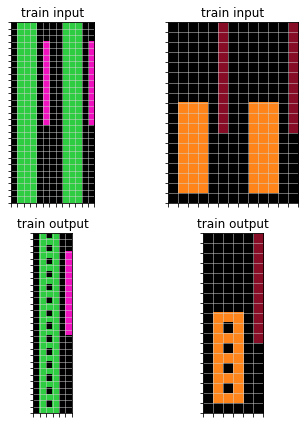

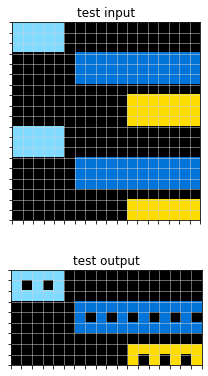

In [75]:
aug_riddle = riddle.copy()
aug_riddle.train= augs(riddle.train)
aug_riddle.test = augs(riddle.test)
plot_task(aug_riddle)